In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
df = pd.read_csv('tidy.csv')
df.head(3)

,gameId,teamHome,teamAway,eventType,eventTeam,period,periodTime,eventSide,coordinateX,coordinateY,shooterName,goalieName,shotType,emptyNet,strength
0,2016020001,Ottawa Senators,Toronto Maple Leafs,0,Toronto Maple Leafs,1,01:11,right,-77.0,5.0,Mitchell Marner,Craig Anderson,Wrist Shot,NaN,NaN
1,2016020001,Ottawa Senators,Toronto Maple Leafs,0,Ottawa Senators,1,02:53,left,86.0,13.0,Chris Kelly,Frederik Andersen,Wrist Shot,NaN,NaN
2,2016020001,Ottawa Senators,Toronto Maple Leafs,0,Ottawa Senators,1,04:01,left,23.0,-38.0,Cody Ceci,Frederik Andersen,Wrist Shot,NaN,NaN


In [38]:
#The first 4 digits identify the season of the game (ie. 2017 for the 2017-2018 season)
df = df.copy()
df['season'] = df['gameId'].apply(lambda x: int(str(x)[:4]))
df.head(3)

,gameId,teamHome,teamAway,eventType,eventTeam,period,periodTime,eventSide,coordinateX,coordinateY,shooterName,goalieName,shotType,emptyNet,strength,season
0,2016020001,Ottawa Senators,Toronto Maple Leafs,0,Toronto Maple Leafs,1,01:11,right,-77.0,5.0,Mitchell Marner,Craig Anderson,Wrist Shot,NaN,NaN,2016
1,2016020001,Ottawa Senators,Toronto Maple Leafs,0,Ottawa Senators,1,02:53,left,86.0,13.0,Chris Kelly,Frederik Andersen,Wrist Shot,NaN,NaN,2016
2,2016020001,Ottawa Senators,Toronto Maple Leafs,0,Ottawa Senators,1,04:01,left,23.0,-38.0,Cody Ceci,Frederik Andersen,Wrist Shot,NaN,NaN,2016


In [39]:
df.columns

Index(['gameId', 'teamHome', 'teamAway', 'eventType', 'eventTeam', 'period',
       'periodTime', 'eventSide', 'coordinateX', 'coordinateY', 'shooterName',
       'goalieName', 'shotType', 'emptyNet', 'strength', 'season'],
      dtype='object')

In [40]:
df.isna().sum()

gameId              0
teamHome            0
teamAway            0
eventType           0
eventTeam           0
period              0
periodTime          0
eventSide       11401
coordinateX        16
coordinateY        15
shooterName         0
goalieName          0
shotType           49
emptyNet       352021
strength       351018
season              0
dtype: int64

In [46]:
df.dropna(subset=['eventSide'],  inplace=True)
df.dropna(subset=['coordinateX'],  inplace=True)
df.dropna(subset=['coordinateY'],  inplace=True)
df.dropna(subset=['shotType'],  inplace=True)
df.isna().sum()

gameId              0
teamHome            0
teamAway            0
eventType           0
eventTeam           0
period              0
periodTime          0
eventSide           0
coordinateX         0
coordinateY         0
shooterName         0
goalieName          0
shotType            0
emptyNet       341645
strength       340647
season              0
dtype: int64

In [47]:
#changing coordinate values. if it is "left", multiply by -1 for getting correct distance
df['new_xcoord'] = np.where(df['eventSide'] == 'left', df['coordinateX'], (-1) * df['coordinateX'])
df['new_ycoord'] = np.where(df['eventSide'] == 'left', df['coordinateY'], (-1) * df['coordinateY'])
df

,gameId,teamHome,teamAway,eventType,eventTeam,period,periodTime,eventSide,coordinateX,coordinateY,shooterName,goalieName,shotType,emptyNet,strength,season,new_xcoord,new_ycoord
0,2016020001,Ottawa Senators,Toronto Maple Leafs,0,Toronto Maple Leafs,1,01:11,right,-77.0,5.0,Mitchell Marner,Craig Anderson,Wrist Shot,NaN,NaN,2016,77.0,-5.0
1,2016020001,Ottawa Senators,Toronto Maple Leafs,0,Ottawa Senators,1,02:53,left,86.0,13.0,Chris Kelly,Frederik Andersen,Wrist Shot,NaN,NaN,2016,86.0,13.0
2,2016020001,Ottawa Senators,Toronto Maple Leafs,0,Ottawa Senators,1,04:01,left,23.0,-38.0,Cody Ceci,Frederik Andersen,Wrist Shot,NaN,NaN,2016,23.0,-38.0
3,2016020001,Ottawa Senators,Toronto Maple Leafs,0,Ottawa Senators,1,04:46,left,33.0,-15.0,Erik Karlsson,Frederik Andersen,Slap Shot,NaN,NaN,2016,33.0,-15.0
4,2016020001,Ottawa Senators,Toronto Maple Leafs,0,Toronto Maple Leafs,1,06:46,right,-34.0,28.0,Martin Marincin,Craig Anderson,Wrist Shot,NaN,NaN,2016,34.0,-28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387824,2020030415,Tampa Bay Lightning,Montréal Canadiens,0,Tampa Bay Lightning,3,16:19,left,57.0,30.0,Blake Coleman,Carey Price,Wrist Shot,NaN,NaN,2020,57.0,30.0
387825,2020030415,Tampa Bay Lightning,Montréal Canadiens,0,Tampa Bay Lightning,3,17:13,left,56.0,-31.0,Mikhail Sergachev,Carey Price,Backhand,NaN,NaN,2020,56.0,-31.0
387826,2020030415,Tampa Bay Lightning,Montréal Canadiens,0,Montréal Canadiens,3,19:01,right,-45.0,-14.0,Tyler Toffoli,Andrei Vasilevskiy,Wrist Shot,NaN,NaN,2020,45.0,14.0
387827,2020030415,Tampa Bay Lightning,Montréal Canadiens,0,Montréal Canadiens,3,19:10,right,-77.0,-3.0,Cole Caufield,Andrei Vasilevskiy,Backhand,NaN,NaN,2020,77.0,3.0


In [50]:
def compute_distance(x1,y1):
    x0 = 89
    y0 = 0
    distance = np.sqrt((x1-x0)**2 + (y1-y0)**2)
    return distance

In [51]:
df['distance'] = df.apply(lambda x: compute_distance(x['new_xcoord'], x['new_ycoord']), axis = 1 )

In [52]:
df

,gameId,teamHome,teamAway,eventType,eventTeam,period,periodTime,eventSide,coordinateX,coordinateY,shooterName,goalieName,shotType,emptyNet,strength,season,new_xcoord,new_ycoord,distance
0,2016020001,Ottawa Senators,Toronto Maple Leafs,0,Toronto Maple Leafs,1,01:11,right,-77.0,5.0,Mitchell Marner,Craig Anderson,Wrist Shot,NaN,NaN,2016,77.0,-5.0,13.000000
1,2016020001,Ottawa Senators,Toronto Maple Leafs,0,Ottawa Senators,1,02:53,left,86.0,13.0,Chris Kelly,Frederik Andersen,Wrist Shot,NaN,NaN,2016,86.0,13.0,13.341664
2,2016020001,Ottawa Senators,Toronto Maple Leafs,0,Ottawa Senators,1,04:01,left,23.0,-38.0,Cody Ceci,Frederik Andersen,Wrist Shot,NaN,NaN,2016,23.0,-38.0,76.157731
3,2016020001,Ottawa Senators,Toronto Maple Leafs,0,Ottawa Senators,1,04:46,left,33.0,-15.0,Erik Karlsson,Frederik Andersen,Slap Shot,NaN,NaN,2016,33.0,-15.0,57.974132
4,2016020001,Ottawa Senators,Toronto Maple Leafs,0,Toronto Maple Leafs,1,06:46,right,-34.0,28.0,Martin Marincin,Craig Anderson,Wrist Shot,NaN,NaN,2016,34.0,-28.0,61.717096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387824,2020030415,Tampa Bay Lightning,Montréal Canadiens,0,Tampa Bay Lightning,3,16:19,left,57.0,30.0,Blake Coleman,Carey Price,Wrist Shot,NaN,NaN,2020,57.0,30.0,43.863424
387825,2020030415,Tampa Bay Lightning,Montréal Canadiens,0,Tampa Bay Lightning,3,17:13,left,56.0,-31.0,Mikhail Sergachev,Carey Price,Backhand,NaN,NaN,2020,56.0,-31.0,45.276926
387826,2020030415,Tampa Bay Lightning,Montréal Canadiens,0,Montréal Canadiens,3,19:01,right,-45.0,-14.0,Tyler Toffoli,Andrei Vasilevskiy,Wrist Shot,NaN,NaN,2020,45.0,14.0,46.173586
387827,2020030415,Tampa Bay Lightning,Montréal Canadiens,0,Montréal Canadiens,3,19:10,right,-77.0,-3.0,Cole Caufield,Andrei Vasilevskiy,Backhand,NaN,NaN,2020,77.0,3.0,12.369317


In [54]:
df['distance'].max()

189.6549498431296

In [55]:
df['distance'].min()

0.0

In [57]:
df.reset_index()

,index,gameId,teamHome,teamAway,eventType,eventTeam,period,periodTime,eventSide,coordinateX,coordinateY,shooterName,goalieName,shotType,emptyNet,strength,season,new_xcoord,new_ycoord,distance
0,0,2016020001,Ottawa Senators,Toronto Maple Leafs,0,Toronto Maple Leafs,1,01:11,right,-77.0,5.0,Mitchell Marner,Craig Anderson,Wrist Shot,NaN,NaN,2016,77.0,-5.0,13.000000
1,1,2016020001,Ottawa Senators,Toronto Maple Leafs,0,Ottawa Senators,1,02:53,left,86.0,13.0,Chris Kelly,Frederik Andersen,Wrist Shot,NaN,NaN,2016,86.0,13.0,13.341664
2,2,2016020001,Ottawa Senators,Toronto Maple Leafs,0,Ottawa Senators,1,04:01,left,23.0,-38.0,Cody Ceci,Frederik Andersen,Wrist Shot,NaN,NaN,2016,23.0,-38.0,76.157731
3,3,2016020001,Ottawa Senators,Toronto Maple Leafs,0,Ottawa Senators,1,04:46,left,33.0,-15.0,Erik Karlsson,Frederik Andersen,Slap Shot,NaN,NaN,2016,33.0,-15.0,57.974132
4,4,2016020001,Ottawa Senators,Toronto Maple Leafs,0,Toronto Maple Leafs,1,06:46,right,-34.0,28.0,Martin Marincin,Craig Anderson,Wrist Shot,NaN,NaN,2016,34.0,-28.0,61.717096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376362,387824,2020030415,Tampa Bay Lightning,Montréal Canadiens,0,Tampa Bay Lightning,3,16:19,left,57.0,30.0,Blake Coleman,Carey Price,Wrist Shot,NaN,NaN,2020,57.0,30.0,43.863424
376363,387825,2020030415,Tampa Bay Lightning,Montréal Canadiens,0,Tampa Bay Lightning,3,17:13,left,56.0,-31.0,Mikhail Sergachev,Carey Price,Backhand,NaN,NaN,2020,56.0,-31.0,45.276926
376364,387826,2020030415,Tampa Bay Lightning,Montréal Canadiens,0,Montréal Canadiens,3,19:01,right,-45.0,-14.0,Tyler Toffoli,Andrei Vasilevskiy,Wrist Shot,NaN,NaN,2020,45.0,14.0,46.173586
376365,387827,2020030415,Tampa Bay Lightning,Montréal Canadiens,0,Montréal Canadiens,3,19:10,right,-77.0,-3.0,Cole Caufield,Andrei Vasilevskiy,Backhand,NaN,NaN,2020,77.0,3.0,12.369317


In [59]:
#Selecting a particular season
season = 2019
df = df[df['season'] == year].reset_index()
df

,index,gameId,teamHome,teamAway,eventType,eventTeam,period,periodTime,eventSide,coordinateX,coordinateY,shooterName,goalieName,shotType,emptyNet,strength,season,new_xcoord,new_ycoord,distance
0,253475,2019020001,Toronto Maple Leafs,Ottawa Senators,1,Ottawa Senators,1,00:25,left,85.0,-1.0,Brady Tkachuk,Frederik Andersen,Tip-In,False,EVEN,2019,85.0,-1.0,4.123106
1,253476,2019020001,Toronto Maple Leafs,Ottawa Senators,0,Toronto Maple Leafs,1,01:31,right,-32.0,-2.0,Morgan Rielly,Craig Anderson,Snap Shot,NaN,NaN,2019,32.0,2.0,57.035077
2,253477,2019020001,Toronto Maple Leafs,Ottawa Senators,0,Ottawa Senators,1,03:23,left,63.0,-6.0,Dylan DeMelo,Frederik Andersen,Snap Shot,NaN,NaN,2019,63.0,-6.0,26.683328
3,253478,2019020001,Toronto Maple Leafs,Ottawa Senators,0,Toronto Maple Leafs,1,03:56,right,-59.0,-20.0,Morgan Rielly,Craig Anderson,Wrist Shot,NaN,NaN,2019,59.0,20.0,36.055513
4,253479,2019020001,Toronto Maple Leafs,Ottawa Senators,0,Toronto Maple Leafs,1,04:47,right,-42.0,-29.0,Tyson Barrie,Craig Anderson,Slap Shot,NaN,NaN,2019,42.0,29.0,55.226805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73512,330090,2019030416,Dallas Stars,Tampa Bay Lightning,0,Tampa Bay Lightning,3,16:01,left,-59.0,-24.0,Anthony Cirelli,Anton Khudobin,Snap Shot,NaN,NaN,2019,-59.0,-24.0,149.933319
73513,330091,2019030416,Dallas Stars,Tampa Bay Lightning,0,Tampa Bay Lightning,3,17:20,left,-81.0,3.0,Blake Coleman,Anton Khudobin,Wrist Shot,NaN,NaN,2019,-81.0,3.0,170.026469
73514,330092,2019030416,Dallas Stars,Tampa Bay Lightning,0,Dallas Stars,3,18:50,right,34.0,-6.0,John Klingberg,Andrei Vasilevskiy,Snap Shot,NaN,NaN,2019,-34.0,6.0,123.146255
73515,330093,2019030416,Dallas Stars,Tampa Bay Lightning,0,Dallas Stars,3,19:27,right,31.0,10.0,John Klingberg,Andrei Vasilevskiy,Wrist Shot,NaN,NaN,2019,-31.0,-10.0,120.415946


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Tip-In'),
  Text(1, 0, 'Snap Shot'),
  Text(2, 0, 'Wrist Shot'),
  Text(3, 0, 'Slap Shot'),
  Text(4, 0, 'Backhand'),
  Text(5, 0, 'Deflected'),
  Text(6, 0, 'Wrap-around')])

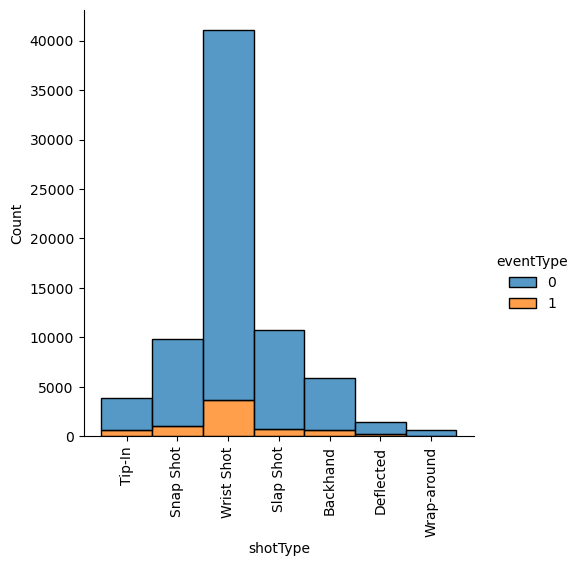

In [60]:
ax = sns.displot(data=df, x = 'shotType', hue='eventType', multiple='stack')
plt.xticks(rotation = 'vertical')

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Tip-In'),
  Text(1, 0, 'Snap Shot'),
  Text(2, 0, 'Wrist Shot'),
  Text(3, 0, 'Slap Shot'),
  Text(4, 0, 'Backhand'),
  Text(5, 0, 'Deflected'),
  Text(6, 0, 'Wrap-around')])

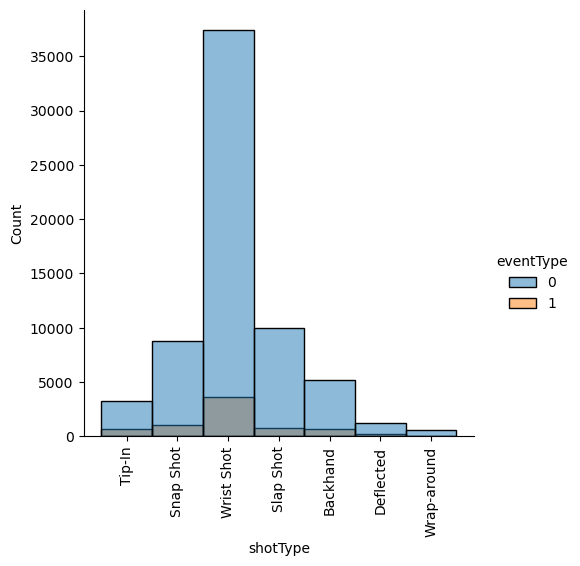

In [61]:
ax = sns.displot(data=df, x = 'shotType', hue='eventType', multiple='layer')
plt.xticks(rotation = 'vertical')

In [62]:
print(df[df['eventType'] == 1]['shotType'].value_counts())
print('\n')
print(df[df['eventType'] == 0]['shotType'].value_counts())
print('\n')
print(df['shotType'].value_counts())

Wrist Shot     3651
Snap Shot      1043
Slap Shot       742
Backhand        698
Tip-In          659
Deflected       222
Wrap-around      50
Name: shotType, dtype: int64


Wrist Shot     37404
Slap Shot       9979
Snap Shot       8809
Backhand        5164
Tip-In          3245
Deflected       1241
Wrap-around      610
Name: shotType, dtype: int64


Wrist Shot     41055
Slap Shot      10721
Snap Shot       9852
Backhand        5862
Tip-In          3904
Deflected       1463
Wrap-around      660
Name: shotType, dtype: int64


In [63]:
goal_percentage = df[df['eventType'] == 1]['shotType'].value_counts() / df['shotType'].value_counts()
print(goal_percentage)

Backhand       0.119072
Deflected      0.151743
Slap Shot      0.069210
Snap Shot      0.105867
Tip-In         0.168801
Wrap-around    0.075758
Wrist Shot     0.088929
Name: shotType, dtype: float64


In [67]:
print(df.distance.min())
print(df.distance.max())

1.4142135623730951
188.0239346466295


In [68]:
df.eventType.value_counts()

0    66452
1     7065
Name: eventType, dtype: int64

In [69]:
df = df.copy()
df['distance_round'] = df['distance'].round()
df

,index,gameId,teamHome,teamAway,eventType,eventTeam,period,periodTime,eventSide,coordinateX,...,shooterName,goalieName,shotType,emptyNet,strength,season,new_xcoord,new_ycoord,distance,distance_round
0,253475,2019020001,Toronto Maple Leafs,Ottawa Senators,1,Ottawa Senators,1,00:25,left,85.0,...,Brady Tkachuk,Frederik Andersen,Tip-In,False,EVEN,2019,85.0,-1.0,4.123106,4.0
1,253476,2019020001,Toronto Maple Leafs,Ottawa Senators,0,Toronto Maple Leafs,1,01:31,right,-32.0,...,Morgan Rielly,Craig Anderson,Snap Shot,NaN,NaN,2019,32.0,2.0,57.035077,57.0
2,253477,2019020001,Toronto Maple Leafs,Ottawa Senators,0,Ottawa Senators,1,03:23,left,63.0,...,Dylan DeMelo,Frederik Andersen,Snap Shot,NaN,NaN,2019,63.0,-6.0,26.683328,27.0
3,253478,2019020001,Toronto Maple Leafs,Ottawa Senators,0,Toronto Maple Leafs,1,03:56,right,-59.0,...,Morgan Rielly,Craig Anderson,Wrist Shot,NaN,NaN,2019,59.0,20.0,36.055513,36.0
4,253479,2019020001,Toronto Maple Leafs,Ottawa Senators,0,Toronto Maple Leafs,1,04:47,right,-42.0,...,Tyson Barrie,Craig Anderson,Slap Shot,NaN,NaN,2019,42.0,29.0,55.226805,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73512,330090,2019030416,Dallas Stars,Tampa Bay Lightning,0,Tampa Bay Lightning,3,16:01,left,-59.0,...,Anthony Cirelli,Anton Khudobin,Snap Shot,NaN,NaN,2019,-59.0,-24.0,149.933319,150.0
73513,330091,2019030416,Dallas Stars,Tampa Bay Lightning,0,Tampa Bay Lightning,3,17:20,left,-81.0,...,Blake Coleman,Anton Khudobin,Wrist Shot,NaN,NaN,2019,-81.0,3.0,170.026469,170.0
73514,330092,2019030416,Dallas Stars,Tampa Bay Lightning,0,Dallas Stars,3,18:50,right,34.0,...,John Klingberg,Andrei Vasilevskiy,Snap Shot,NaN,NaN,2019,-34.0,6.0,123.146255,123.0
73515,330093,2019030416,Dallas Stars,Tampa Bay Lightning,0,Dallas Stars,3,19:27,right,31.0,...,John Klingberg,Andrei Vasilevskiy,Wrist Shot,NaN,NaN,2019,-31.0,-10.0,120.415946,120.0


In [71]:
print(df.distance_round.min())
print(df.distance_round.max())

1.0
188.0


In [72]:
df['distance_round'].value_counts()

9.0      2241
11.0     1830
10.0     1603
13.0     1514
8.0      1485
         ... 
117.0      12
113.0      12
118.0      12
188.0       4
1.0         2
Name: distance_round, Length: 188, dtype: int64

In [73]:
df_goals_only = df[df['eventType'] == 1]
df_goals_only

,index,gameId,teamHome,teamAway,eventType,eventTeam,period,periodTime,eventSide,coordinateX,...,shooterName,goalieName,shotType,emptyNet,strength,season,new_xcoord,new_ycoord,distance,distance_round
0,253475,2019020001,Toronto Maple Leafs,Ottawa Senators,1,Ottawa Senators,1,00:25,left,85.0,...,Brady Tkachuk,Frederik Andersen,Tip-In,False,EVEN,2019,85.0,-1.0,4.123106,4.0
29,253504,2019020001,Toronto Maple Leafs,Ottawa Senators,1,Toronto Maple Leafs,2,02:20,left,86.0,...,Frederik Gauthier,Craig Anderson,Wrist Shot,False,EVEN,2019,86.0,0.0,3.000000,3.0
34,253509,2019020001,Toronto Maple Leafs,Ottawa Senators,1,Toronto Maple Leafs,2,04:42,left,84.0,...,Trevor Moore,Craig Anderson,Slap Shot,False,EVEN,2019,84.0,2.0,5.385165,5.0
35,253510,2019020001,Toronto Maple Leafs,Ottawa Senators,1,Ottawa Senators,2,05:51,right,-83.0,...,Scott Sabourin,Frederik Andersen,Wrist Shot,False,EVEN,2019,83.0,6.0,8.485281,8.0
37,253512,2019020001,Toronto Maple Leafs,Ottawa Senators,1,Toronto Maple Leafs,2,08:02,left,83.0,...,Auston Matthews,Craig Anderson,Wrist Shot,False,EVEN,2019,83.0,5.0,7.810250,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73431,330009,2019030415,Tampa Bay Lightning,Dallas Stars,1,Tampa Bay Lightning,3,03:38,left,-34.0,...,Mikhail Sergachev,Anton Khudobin,Slap Shot,False,EVEN,2019,-34.0,-20.0,124.615408,125.0
73445,330023,2019030415,Tampa Bay Lightning,Dallas Stars,1,Dallas Stars,3,13:15,right,83.0,...,Joe Pavelski,Andrei Vasilevskiy,Wrist Shot,False,EVEN,2019,-83.0,-4.0,172.046505,172.0
73465,330043,2019030415,Tampa Bay Lightning,Dallas Stars,1,Dallas Stars,5,09:23,shootout,80.0,...,Corey Perry,Andrei Vasilevskiy,Wrist Shot,False,EVEN,2019,-80.0,-2.0,169.011834,169.0
73473,330051,2019030416,Dallas Stars,Tampa Bay Lightning,1,Tampa Bay Lightning,1,12:23,left,-80.0,...,Brayden Point,Anton Khudobin,Wrist Shot,False,PPG,2019,-80.0,0.0,169.000000,169.0


In [74]:
df_goals_only['distance_round'].value_counts()

9.0      431
11.0     332
8.0      318
10.0     311
12.0     277
        ... 
72.0       1
103.0      1
186.0      1
110.0      1
114.0      1
Name: distance_round, Length: 171, dtype: int64

In [75]:
df_nogoals = df[df['eventType'] == 0]
df_nogoals

,index,gameId,teamHome,teamAway,eventType,eventTeam,period,periodTime,eventSide,coordinateX,...,shooterName,goalieName,shotType,emptyNet,strength,season,new_xcoord,new_ycoord,distance,distance_round
1,253476,2019020001,Toronto Maple Leafs,Ottawa Senators,0,Toronto Maple Leafs,1,01:31,right,-32.0,...,Morgan Rielly,Craig Anderson,Snap Shot,NaN,NaN,2019,32.0,2.0,57.035077,57.0
2,253477,2019020001,Toronto Maple Leafs,Ottawa Senators,0,Ottawa Senators,1,03:23,left,63.0,...,Dylan DeMelo,Frederik Andersen,Snap Shot,NaN,NaN,2019,63.0,-6.0,26.683328,27.0
3,253478,2019020001,Toronto Maple Leafs,Ottawa Senators,0,Toronto Maple Leafs,1,03:56,right,-59.0,...,Morgan Rielly,Craig Anderson,Wrist Shot,NaN,NaN,2019,59.0,20.0,36.055513,36.0
4,253479,2019020001,Toronto Maple Leafs,Ottawa Senators,0,Toronto Maple Leafs,1,04:47,right,-42.0,...,Tyson Barrie,Craig Anderson,Slap Shot,NaN,NaN,2019,42.0,29.0,55.226805,55.0
5,253480,2019020001,Toronto Maple Leafs,Ottawa Senators,0,Toronto Maple Leafs,1,04:53,right,-52.0,...,Tyson Barrie,Craig Anderson,Slap Shot,NaN,NaN,2019,52.0,7.0,37.656341,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73512,330090,2019030416,Dallas Stars,Tampa Bay Lightning,0,Tampa Bay Lightning,3,16:01,left,-59.0,...,Anthony Cirelli,Anton Khudobin,Snap Shot,NaN,NaN,2019,-59.0,-24.0,149.933319,150.0
73513,330091,2019030416,Dallas Stars,Tampa Bay Lightning,0,Tampa Bay Lightning,3,17:20,left,-81.0,...,Blake Coleman,Anton Khudobin,Wrist Shot,NaN,NaN,2019,-81.0,3.0,170.026469,170.0
73514,330092,2019030416,Dallas Stars,Tampa Bay Lightning,0,Dallas Stars,3,18:50,right,34.0,...,John Klingberg,Andrei Vasilevskiy,Snap Shot,NaN,NaN,2019,-34.0,6.0,123.146255,123.0
73515,330093,2019030416,Dallas Stars,Tampa Bay Lightning,0,Dallas Stars,3,19:27,right,31.0,...,John Klingberg,Andrei Vasilevskiy,Wrist Shot,NaN,NaN,2019,-31.0,-10.0,120.415946,120.0


In [76]:
df_goals_only.groupby(['distance_round'])['eventType'].count()

distance_round
1.0        2
2.0        7
3.0       21
4.0       68
5.0      104
        ... 
184.0      1
185.0      4
186.0      1
187.0      3
188.0      2
Name: eventType, Length: 171, dtype: int64

In [77]:
df.groupby(['distance_round'])['eventType'].count()

distance_round
1.0        2
2.0       13
3.0       52
4.0      231
5.0      400
        ... 
184.0     20
185.0     26
186.0     16
187.0     14
188.0      4
Name: eventType, Length: 188, dtype: int64

In [78]:
goal_score_percent_by_dist = (df_goals_only.groupby(['distance_round'])['eventType'].count() / 
        df.groupby(['distance_round'])['eventType'].count() ) * 100
    
goal_score_percent_by_dist

distance_round
1.0      100.000000
2.0       53.846154
3.0       40.384615
4.0       29.437229
5.0       26.000000
            ...    
184.0      5.000000
185.0     15.384615
186.0      6.250000
187.0     21.428571
188.0     50.000000
Name: eventType, Length: 188, dtype: float64

In [79]:
goal_score_percent_by_dist = goal_score_percent_by_dist.rename_axis('Distance (ft)')
goal_score_percent_by_dist = goal_score_percent_by_dist.rename('Goal Percentage')
goal_score_percent_by_dist

Distance (ft)
1.0      100.000000
2.0       53.846154
3.0       40.384615
4.0       29.437229
5.0       26.000000
            ...    
184.0      5.000000
185.0     15.384615
186.0      6.250000
187.0     21.428571
188.0     50.000000
Name: Goal Percentage, Length: 188, dtype: float64

Text(0.5, 1.0, 'Goal Percentage vs Distance from Net (ft) for 2019')

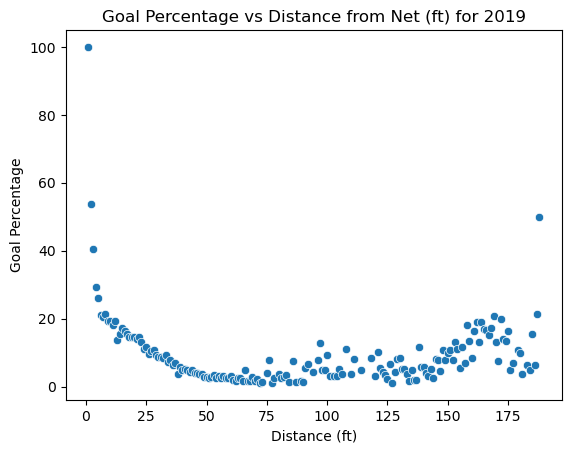

In [80]:
sns.scatterplot(x=goal_score_percent_by_dist.index, y=goal_score_percent_by_dist)
plt.title(f'Goal Percentage vs Distance from Net (ft) for {year}')

In [81]:
df = df.copy()
df['distance_round'] = df['distance'].round()
df

,index,gameId,teamHome,teamAway,eventType,eventTeam,period,periodTime,eventSide,coordinateX,...,shooterName,goalieName,shotType,emptyNet,strength,season,new_xcoord,new_ycoord,distance,distance_round
0,253475,2019020001,Toronto Maple Leafs,Ottawa Senators,1,Ottawa Senators,1,00:25,left,85.0,...,Brady Tkachuk,Frederik Andersen,Tip-In,False,EVEN,2019,85.0,-1.0,4.123106,4.0
1,253476,2019020001,Toronto Maple Leafs,Ottawa Senators,0,Toronto Maple Leafs,1,01:31,right,-32.0,...,Morgan Rielly,Craig Anderson,Snap Shot,NaN,NaN,2019,32.0,2.0,57.035077,57.0
2,253477,2019020001,Toronto Maple Leafs,Ottawa Senators,0,Ottawa Senators,1,03:23,left,63.0,...,Dylan DeMelo,Frederik Andersen,Snap Shot,NaN,NaN,2019,63.0,-6.0,26.683328,27.0
3,253478,2019020001,Toronto Maple Leafs,Ottawa Senators,0,Toronto Maple Leafs,1,03:56,right,-59.0,...,Morgan Rielly,Craig Anderson,Wrist Shot,NaN,NaN,2019,59.0,20.0,36.055513,36.0
4,253479,2019020001,Toronto Maple Leafs,Ottawa Senators,0,Toronto Maple Leafs,1,04:47,right,-42.0,...,Tyson Barrie,Craig Anderson,Slap Shot,NaN,NaN,2019,42.0,29.0,55.226805,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73512,330090,2019030416,Dallas Stars,Tampa Bay Lightning,0,Tampa Bay Lightning,3,16:01,left,-59.0,...,Anthony Cirelli,Anton Khudobin,Snap Shot,NaN,NaN,2019,-59.0,-24.0,149.933319,150.0
73513,330091,2019030416,Dallas Stars,Tampa Bay Lightning,0,Tampa Bay Lightning,3,17:20,left,-81.0,...,Blake Coleman,Anton Khudobin,Wrist Shot,NaN,NaN,2019,-81.0,3.0,170.026469,170.0
73514,330092,2019030416,Dallas Stars,Tampa Bay Lightning,0,Dallas Stars,3,18:50,right,34.0,...,John Klingberg,Andrei Vasilevskiy,Snap Shot,NaN,NaN,2019,-34.0,6.0,123.146255,123.0
73515,330093,2019030416,Dallas Stars,Tampa Bay Lightning,0,Dallas Stars,3,19:27,right,31.0,...,John Klingberg,Andrei Vasilevskiy,Wrist Shot,NaN,NaN,2019,-31.0,-10.0,120.415946,120.0


In [82]:
df_goals_only = df[df['eventType'] == 1]
goal_score_percent_by_distance = (df_goals_only.groupby(['distance_round', 'shotType'])['eventType'].count() / 
        df.groupby(['distance_round', 'shotType'])['eventType'].count() ) * 100
df_goals_only

,index,gameId,teamHome,teamAway,eventType,eventTeam,period,periodTime,eventSide,coordinateX,...,shooterName,goalieName,shotType,emptyNet,strength,season,new_xcoord,new_ycoord,distance,distance_round
0,253475,2019020001,Toronto Maple Leafs,Ottawa Senators,1,Ottawa Senators,1,00:25,left,85.0,...,Brady Tkachuk,Frederik Andersen,Tip-In,False,EVEN,2019,85.0,-1.0,4.123106,4.0
29,253504,2019020001,Toronto Maple Leafs,Ottawa Senators,1,Toronto Maple Leafs,2,02:20,left,86.0,...,Frederik Gauthier,Craig Anderson,Wrist Shot,False,EVEN,2019,86.0,0.0,3.000000,3.0
34,253509,2019020001,Toronto Maple Leafs,Ottawa Senators,1,Toronto Maple Leafs,2,04:42,left,84.0,...,Trevor Moore,Craig Anderson,Slap Shot,False,EVEN,2019,84.0,2.0,5.385165,5.0
35,253510,2019020001,Toronto Maple Leafs,Ottawa Senators,1,Ottawa Senators,2,05:51,right,-83.0,...,Scott Sabourin,Frederik Andersen,Wrist Shot,False,EVEN,2019,83.0,6.0,8.485281,8.0
37,253512,2019020001,Toronto Maple Leafs,Ottawa Senators,1,Toronto Maple Leafs,2,08:02,left,83.0,...,Auston Matthews,Craig Anderson,Wrist Shot,False,EVEN,2019,83.0,5.0,7.810250,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73431,330009,2019030415,Tampa Bay Lightning,Dallas Stars,1,Tampa Bay Lightning,3,03:38,left,-34.0,...,Mikhail Sergachev,Anton Khudobin,Slap Shot,False,EVEN,2019,-34.0,-20.0,124.615408,125.0
73445,330023,2019030415,Tampa Bay Lightning,Dallas Stars,1,Dallas Stars,3,13:15,right,83.0,...,Joe Pavelski,Andrei Vasilevskiy,Wrist Shot,False,EVEN,2019,-83.0,-4.0,172.046505,172.0
73465,330043,2019030415,Tampa Bay Lightning,Dallas Stars,1,Dallas Stars,5,09:23,shootout,80.0,...,Corey Perry,Andrei Vasilevskiy,Wrist Shot,False,EVEN,2019,-80.0,-2.0,169.011834,169.0
73473,330051,2019030416,Dallas Stars,Tampa Bay Lightning,1,Tampa Bay Lightning,1,12:23,left,-80.0,...,Brayden Point,Anton Khudobin,Wrist Shot,False,PPG,2019,-80.0,0.0,169.000000,169.0


In [83]:
goal_score_percent_by_distance

distance_round  shotType   
1.0             Wrist Shot     100.000000
2.0             Deflected      100.000000
                Snap Shot      100.000000
                Tip-In         100.000000
                Wrap-around           NaN
                                  ...    
187.0           Slap Shot             NaN
                Snap Shot       50.000000
                Wrist Shot      25.000000
188.0           Snap Shot             NaN
                Wrist Shot      66.666667
Name: eventType, Length: 1038, dtype: float64

In [85]:
goal_score_percent_by_distance = goal_score_percent_by_distance.reset_index().dropna()
goal_score_percent_by_distance

,distance_round,shotType,eventType
0,1.0,Wrist Shot,100.000000
1,2.0,Deflected,100.000000
2,2.0,Snap Shot,100.000000
3,2.0,Tip-In,100.000000
5,2.0,Wrist Shot,57.142857
...,...,...,...
1029,185.0,Wrist Shot,16.666667
1031,186.0,Wrist Shot,8.333333
1034,187.0,Snap Shot,50.000000
1035,187.0,Wrist Shot,25.000000


In [86]:
goal_score_percent_by_distance = goal_score_percent_by_distance.rename(columns={
        'eventType': 'Goal Percentage',
        'distance_round': 'Distance (ft)',
        'shotType': 'Shot Type'
    })
goal_score_percent_by_distance


,Distance (ft),Shot Type,Goal Percentage
0,1.0,Wrist Shot,100.000000
1,2.0,Deflected,100.000000
2,2.0,Snap Shot,100.000000
3,2.0,Tip-In,100.000000
5,2.0,Wrist Shot,57.142857
...,...,...,...
1029,185.0,Wrist Shot,16.666667
1031,186.0,Wrist Shot,8.333333
1034,187.0,Snap Shot,50.000000
1035,187.0,Wrist Shot,25.000000


<Figure size 3000x1200 with 0 Axes>

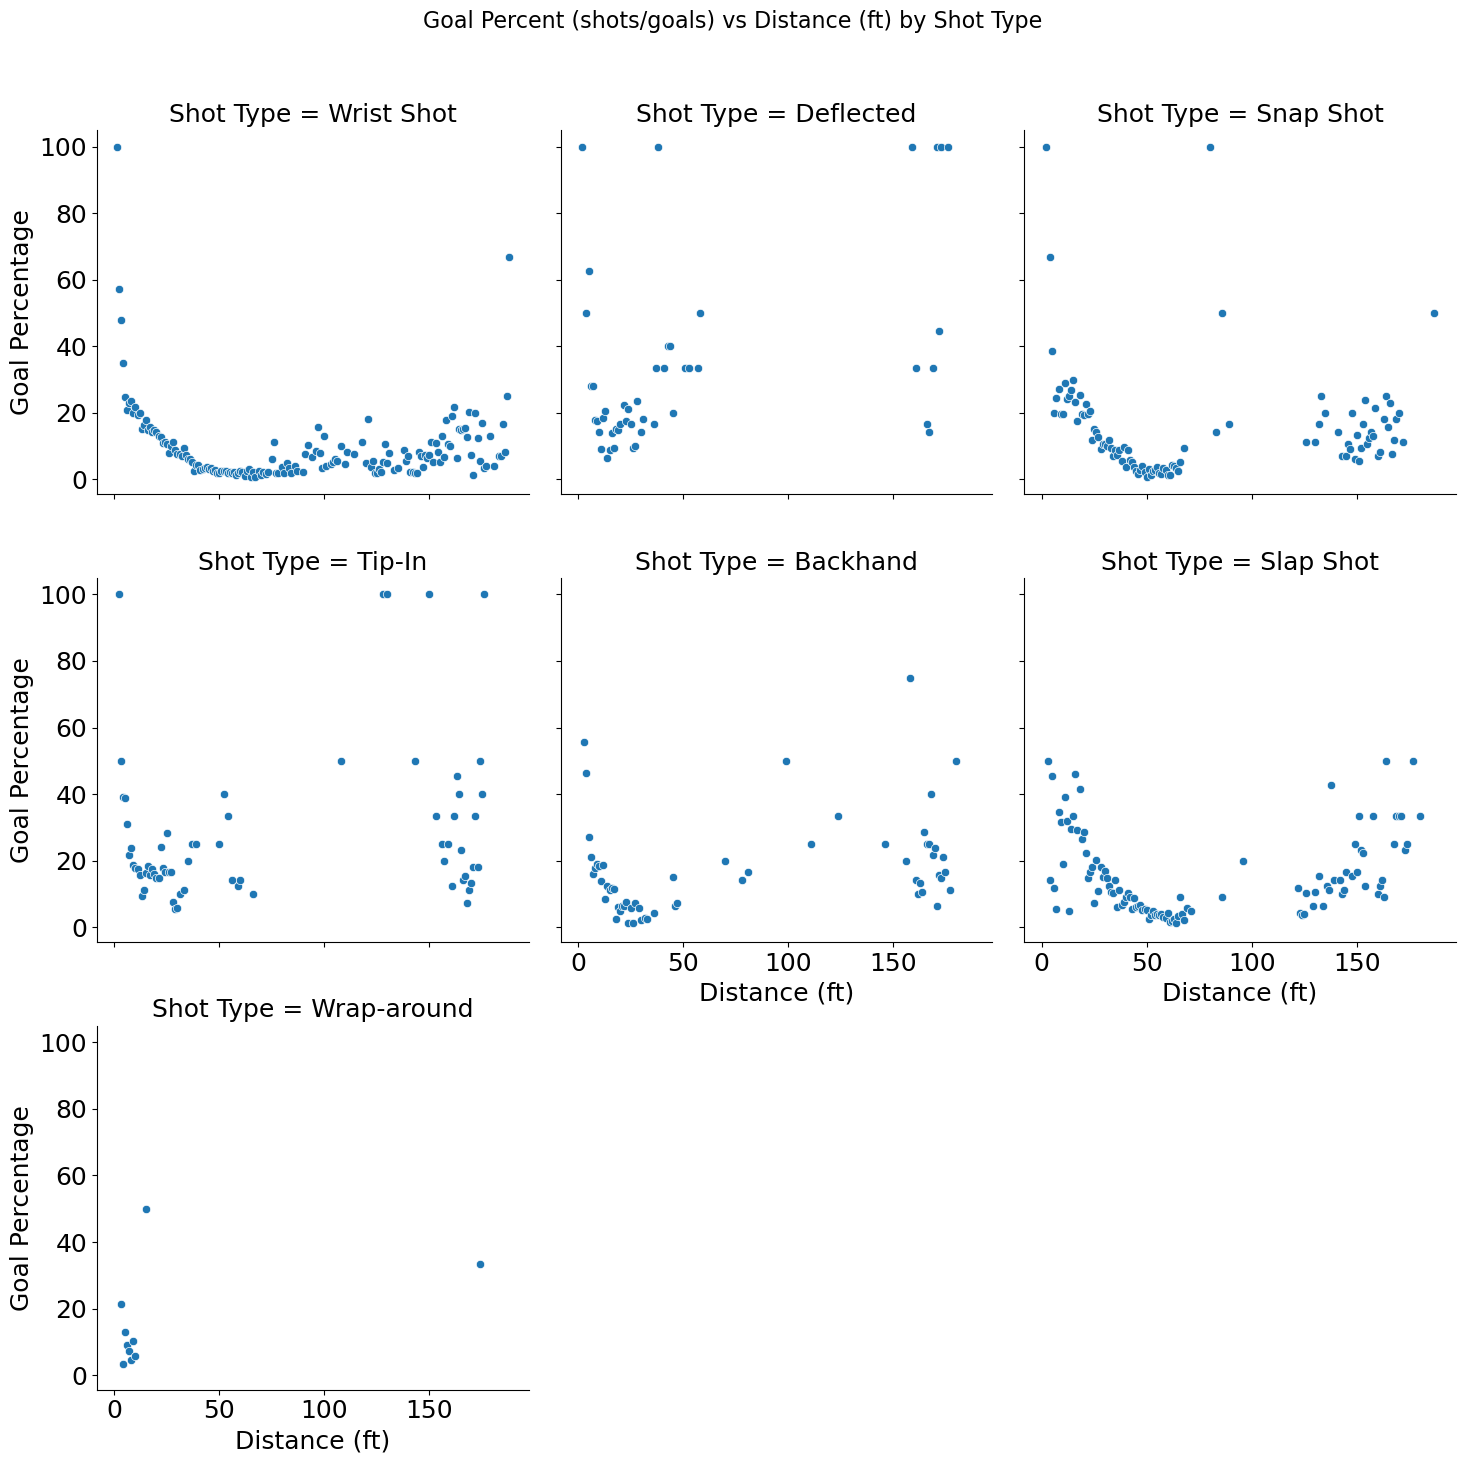

In [87]:
plt.figure(figsize=(30,12))
plt.rcParams["axes.labelsize"] = 18
#plt.rcParams.update({'font.size': 16, 'font.weight': 'bold'})
plt.rcParams.update({'font.size': 18})
ax = sns.relplot(
        x=goal_score_percent_by_distance['Distance (ft)'], 
        y=goal_score_percent_by_distance['Goal Percentage'], 
        col=goal_score_percent_by_distance['Shot Type'],
        col_wrap=3,
    )



plt.suptitle(f'Goal Percent (shots/goals) vs Distance (ft) by Shot Type', fontsize=16)
#plt.xticks(rotation = 'vertical')
#plt.xlabel(fontsize=16)
#plt.tight_layout()
ax.fig.subplots_adjust( top = 0.9 )


In [89]:
df = df.copy()
df

,index,gameId,teamHome,teamAway,eventType,eventTeam,period,periodTime,eventSide,coordinateX,...,shooterName,goalieName,shotType,emptyNet,strength,season,new_xcoord,new_ycoord,distance,distance_round
0,253475,2019020001,Toronto Maple Leafs,Ottawa Senators,1,Ottawa Senators,1,00:25,left,85.0,...,Brady Tkachuk,Frederik Andersen,Tip-In,False,EVEN,2019,85.0,-1.0,4.123106,4.0
1,253476,2019020001,Toronto Maple Leafs,Ottawa Senators,0,Toronto Maple Leafs,1,01:31,right,-32.0,...,Morgan Rielly,Craig Anderson,Snap Shot,NaN,NaN,2019,32.0,2.0,57.035077,57.0
2,253477,2019020001,Toronto Maple Leafs,Ottawa Senators,0,Ottawa Senators,1,03:23,left,63.0,...,Dylan DeMelo,Frederik Andersen,Snap Shot,NaN,NaN,2019,63.0,-6.0,26.683328,27.0
3,253478,2019020001,Toronto Maple Leafs,Ottawa Senators,0,Toronto Maple Leafs,1,03:56,right,-59.0,...,Morgan Rielly,Craig Anderson,Wrist Shot,NaN,NaN,2019,59.0,20.0,36.055513,36.0
4,253479,2019020001,Toronto Maple Leafs,Ottawa Senators,0,Toronto Maple Leafs,1,04:47,right,-42.0,...,Tyson Barrie,Craig Anderson,Slap Shot,NaN,NaN,2019,42.0,29.0,55.226805,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73512,330090,2019030416,Dallas Stars,Tampa Bay Lightning,0,Tampa Bay Lightning,3,16:01,left,-59.0,...,Anthony Cirelli,Anton Khudobin,Snap Shot,NaN,NaN,2019,-59.0,-24.0,149.933319,150.0
73513,330091,2019030416,Dallas Stars,Tampa Bay Lightning,0,Tampa Bay Lightning,3,17:20,left,-81.0,...,Blake Coleman,Anton Khudobin,Wrist Shot,NaN,NaN,2019,-81.0,3.0,170.026469,170.0
73514,330092,2019030416,Dallas Stars,Tampa Bay Lightning,0,Dallas Stars,3,18:50,right,34.0,...,John Klingberg,Andrei Vasilevskiy,Snap Shot,NaN,NaN,2019,-34.0,6.0,123.146255,123.0
73515,330093,2019030416,Dallas Stars,Tampa Bay Lightning,0,Dallas Stars,3,19:27,right,31.0,...,John Klingberg,Andrei Vasilevskiy,Wrist Shot,NaN,NaN,2019,-31.0,-10.0,120.415946,120.0


In [91]:
df['distance_1ft'] = df['distance'].copy()

df

,index,gameId,teamHome,teamAway,eventType,eventTeam,period,periodTime,eventSide,coordinateX,...,goalieName,shotType,emptyNet,strength,season,new_xcoord,new_ycoord,distance,distance_round,distance_1ft
0,253475,2019020001,Toronto Maple Leafs,Ottawa Senators,1,Ottawa Senators,1,00:25,left,85.0,...,Frederik Andersen,Tip-In,False,EVEN,2019,85.0,-1.0,4.123106,4.0,4.123106
1,253476,2019020001,Toronto Maple Leafs,Ottawa Senators,0,Toronto Maple Leafs,1,01:31,right,-32.0,...,Craig Anderson,Snap Shot,NaN,NaN,2019,32.0,2.0,57.035077,57.0,57.035077
2,253477,2019020001,Toronto Maple Leafs,Ottawa Senators,0,Ottawa Senators,1,03:23,left,63.0,...,Frederik Andersen,Snap Shot,NaN,NaN,2019,63.0,-6.0,26.683328,27.0,26.683328
3,253478,2019020001,Toronto Maple Leafs,Ottawa Senators,0,Toronto Maple Leafs,1,03:56,right,-59.0,...,Craig Anderson,Wrist Shot,NaN,NaN,2019,59.0,20.0,36.055513,36.0,36.055513
4,253479,2019020001,Toronto Maple Leafs,Ottawa Senators,0,Toronto Maple Leafs,1,04:47,right,-42.0,...,Craig Anderson,Slap Shot,NaN,NaN,2019,42.0,29.0,55.226805,55.0,55.226805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73512,330090,2019030416,Dallas Stars,Tampa Bay Lightning,0,Tampa Bay Lightning,3,16:01,left,-59.0,...,Anton Khudobin,Snap Shot,NaN,NaN,2019,-59.0,-24.0,149.933319,150.0,149.933319
73513,330091,2019030416,Dallas Stars,Tampa Bay Lightning,0,Tampa Bay Lightning,3,17:20,left,-81.0,...,Anton Khudobin,Wrist Shot,NaN,NaN,2019,-81.0,3.0,170.026469,170.0,170.026469
73514,330092,2019030416,Dallas Stars,Tampa Bay Lightning,0,Dallas Stars,3,18:50,right,34.0,...,Andrei Vasilevskiy,Snap Shot,NaN,NaN,2019,-34.0,6.0,123.146255,123.0,123.146255
73515,330093,2019030416,Dallas Stars,Tampa Bay Lightning,0,Dallas Stars,3,19:27,right,31.0,...,Andrei Vasilevskiy,Wrist Shot,NaN,NaN,2019,-31.0,-10.0,120.415946,120.0,120.415946


In [100]:
df_goals_only = df[df['eventType'] == 1]
df_goals_only


,index,gameId,teamHome,teamAway,eventType,eventTeam,period,periodTime,eventSide,coordinateX,...,goalieName,shotType,emptyNet,strength,season,new_xcoord,new_ycoord,distance,distance_round,distance_1ft
0,253475,2019020001,Toronto Maple Leafs,Ottawa Senators,1,Ottawa Senators,1,00:25,left,85.0,...,Frederik Andersen,Tip-In,False,EVEN,2019,85.0,-1.0,4.123106,4.0,4.123106
29,253504,2019020001,Toronto Maple Leafs,Ottawa Senators,1,Toronto Maple Leafs,2,02:20,left,86.0,...,Craig Anderson,Wrist Shot,False,EVEN,2019,86.0,0.0,3.000000,3.0,3.000000
34,253509,2019020001,Toronto Maple Leafs,Ottawa Senators,1,Toronto Maple Leafs,2,04:42,left,84.0,...,Craig Anderson,Slap Shot,False,EVEN,2019,84.0,2.0,5.385165,5.0,5.385165
35,253510,2019020001,Toronto Maple Leafs,Ottawa Senators,1,Ottawa Senators,2,05:51,right,-83.0,...,Frederik Andersen,Wrist Shot,False,EVEN,2019,83.0,6.0,8.485281,8.0,8.485281
37,253512,2019020001,Toronto Maple Leafs,Ottawa Senators,1,Toronto Maple Leafs,2,08:02,left,83.0,...,Craig Anderson,Wrist Shot,False,EVEN,2019,83.0,5.0,7.810250,8.0,7.810250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73431,330009,2019030415,Tampa Bay Lightning,Dallas Stars,1,Tampa Bay Lightning,3,03:38,left,-34.0,...,Anton Khudobin,Slap Shot,False,EVEN,2019,-34.0,-20.0,124.615408,125.0,124.615408
73445,330023,2019030415,Tampa Bay Lightning,Dallas Stars,1,Dallas Stars,3,13:15,right,83.0,...,Andrei Vasilevskiy,Wrist Shot,False,EVEN,2019,-83.0,-4.0,172.046505,172.0,172.046505
73465,330043,2019030415,Tampa Bay Lightning,Dallas Stars,1,Dallas Stars,5,09:23,shootout,80.0,...,Andrei Vasilevskiy,Wrist Shot,False,EVEN,2019,-80.0,-2.0,169.011834,169.0,169.011834
73473,330051,2019030416,Dallas Stars,Tampa Bay Lightning,1,Tampa Bay Lightning,1,12:23,left,-80.0,...,Anton Khudobin,Wrist Shot,False,PPG,2019,-80.0,0.0,169.000000,169.0,169.000000


In [101]:
goal_score_percent_by_distance = (
        df_goals_only.groupby(['distance_1ft', 'shotType'])['eventType'].count() / 
        df.groupby(['distance_1ft', 'shotType'])['eventType'].count()
    ) * 100

print(goal_score_percent_by_distance)   

distance_1ft  shotType   
1.414214      Wrist Shot     100.0
2.000000      Snap Shot      100.0
              Wrap-around      NaN
              Wrist Shot      50.0
2.236068      Deflected      100.0
                             ...  
187.181730    Wrist Shot     100.0
187.323250    Slap Shot        NaN
187.523332    Wrist Shot      50.0
187.672587    Snap Shot        NaN
188.023935    Wrist Shot     100.0
Name: eventType, Length: 10148, dtype: float64


In [112]:
goal_score_percent_by_distance = goal_score_percent_by_distance.reset_index().dropna()
goal_score_percent_by_distance = goal_score_percent_by_distance.rename(columns={
        'eventType': 'Goal Percentage',
        'distance_1ft': 'Distance (ft)',
        'shotType': 'Shot Type'
    })
goal_score_percent_by_distance

,index,Distance (ft),Shot Type,Goal Percentage
0,0,1.414214,Wrist Shot,100.0
1,1,2.000000,Snap Shot,100.0
2,3,2.000000,Wrist Shot,50.0
3,4,2.236068,Deflected,100.0
4,5,2.236068,Tip-In,100.0
...,...,...,...,...
2661,10140,187.096232,Wrist Shot,100.0
2662,10142,187.181730,Snap Shot,100.0
2663,10143,187.181730,Wrist Shot,100.0
2664,10145,187.523332,Wrist Shot,50.0


In [116]:
shot_types = goal_score_percent_by_distance['Shot Type'].unique()
shot_types

array(['Wrist Shot', 'Snap Shot', 'Deflected', 'Tip-In', 'Backhand',
       'Wrap-around', 'Slap Shot'], dtype=object)

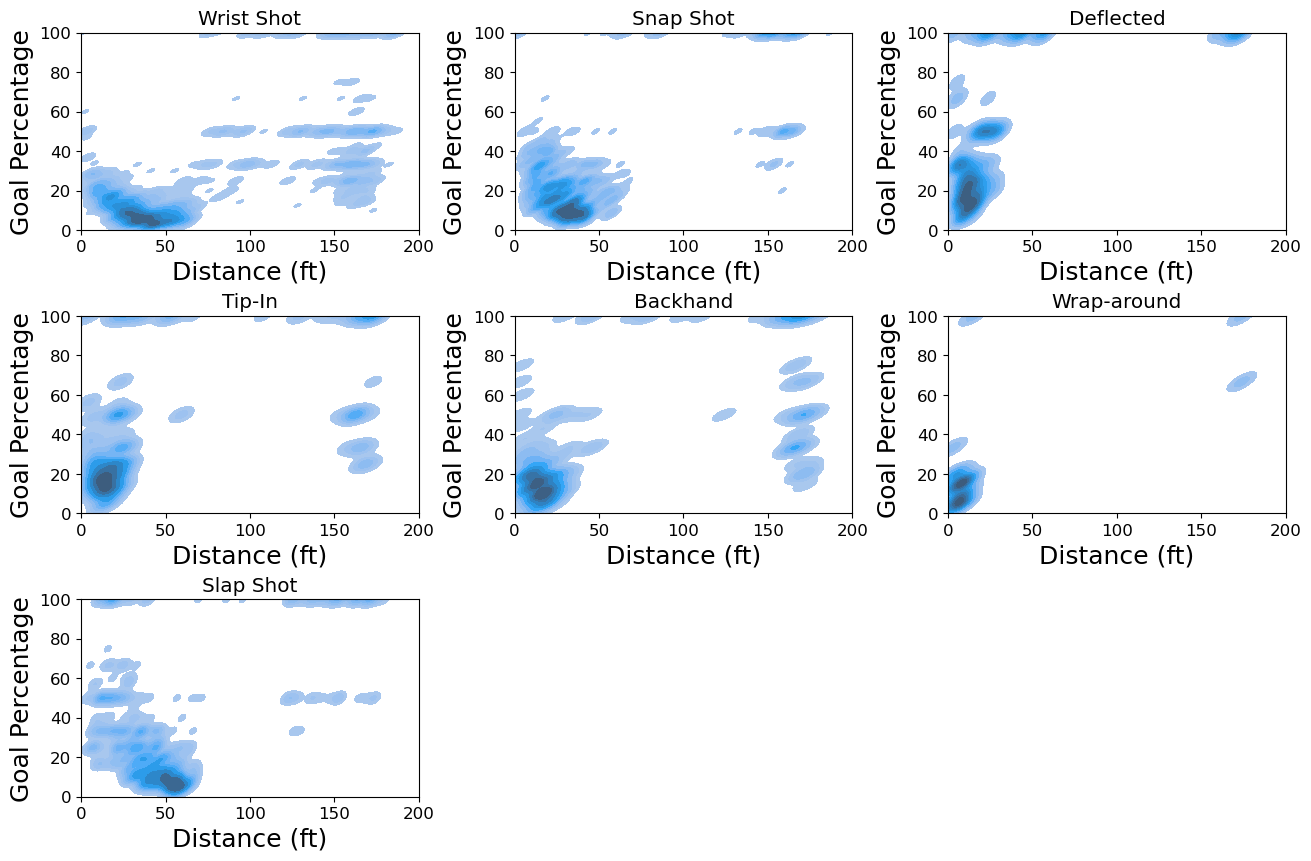

In [152]:
fig, axs = plt.subplots(3,3, figsize=(13, 8.5), constrained_layout=True)
plt.axis('on')
#plt.rcParams["axes.labelsize"] = 12
plt.rcParams.update({'font.size': 14})
for i, shot in enumerate(shot_types):
    subset = goal_score_percent_by_distance[goal_score_percent_by_distance['Shot Type'] == shot]
    i, j = int(i/3), i%3
    
    sns.kdeplot(ax=axs[i, j],data=subset,x='Distance (ft)', y='Goal Percentage', 
            hue_norm=(0,100),
            bw_adjust=.2,
            fill=True,palette='crest'
        )
    axs[i, j].title.set_text(shot)
    axs[i, j].set_xlim([0,200])
    axs[i, j].set_ylim([0,100])
    axs[-1, -1].axis('off')
    axs[-1, -2].axis('off')
    #fig.suptitle(f'Density Plot of Goal Percent vs Distance by Shot Type \n ({season_year} - {season_year+1})', fontsize=16)


In [132]:
df

,index,gameId,teamHome,teamAway,eventType,eventTeam,period,periodTime,eventSide,coordinateX,...,goalieName,shotType,emptyNet,strength,season,new_xcoord,new_ycoord,distance,distance_round,distance_1ft
0,253475,2019020001,Toronto Maple Leafs,Ottawa Senators,1,Ottawa Senators,1,00:25,left,85.0,...,Frederik Andersen,Tip-In,False,EVEN,2019,85.0,-1.0,4.123106,4.0,4.123106
1,253476,2019020001,Toronto Maple Leafs,Ottawa Senators,0,Toronto Maple Leafs,1,01:31,right,-32.0,...,Craig Anderson,Snap Shot,NaN,NaN,2019,32.0,2.0,57.035077,57.0,57.035077
2,253477,2019020001,Toronto Maple Leafs,Ottawa Senators,0,Ottawa Senators,1,03:23,left,63.0,...,Frederik Andersen,Snap Shot,NaN,NaN,2019,63.0,-6.0,26.683328,27.0,26.683328
3,253478,2019020001,Toronto Maple Leafs,Ottawa Senators,0,Toronto Maple Leafs,1,03:56,right,-59.0,...,Craig Anderson,Wrist Shot,NaN,NaN,2019,59.0,20.0,36.055513,36.0,36.055513
4,253479,2019020001,Toronto Maple Leafs,Ottawa Senators,0,Toronto Maple Leafs,1,04:47,right,-42.0,...,Craig Anderson,Slap Shot,NaN,NaN,2019,42.0,29.0,55.226805,55.0,55.226805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73512,330090,2019030416,Dallas Stars,Tampa Bay Lightning,0,Tampa Bay Lightning,3,16:01,left,-59.0,...,Anton Khudobin,Snap Shot,NaN,NaN,2019,-59.0,-24.0,149.933319,150.0,149.933319
73513,330091,2019030416,Dallas Stars,Tampa Bay Lightning,0,Tampa Bay Lightning,3,17:20,left,-81.0,...,Anton Khudobin,Wrist Shot,NaN,NaN,2019,-81.0,3.0,170.026469,170.0,170.026469
73514,330092,2019030416,Dallas Stars,Tampa Bay Lightning,0,Dallas Stars,3,18:50,right,34.0,...,Andrei Vasilevskiy,Snap Shot,NaN,NaN,2019,-34.0,6.0,123.146255,123.0,123.146255
73515,330093,2019030416,Dallas Stars,Tampa Bay Lightning,0,Dallas Stars,3,19:27,right,31.0,...,Andrei Vasilevskiy,Wrist Shot,NaN,NaN,2019,-31.0,-10.0,120.415946,120.0,120.415946


Text(0, 0.5, 'Distance (ft)')

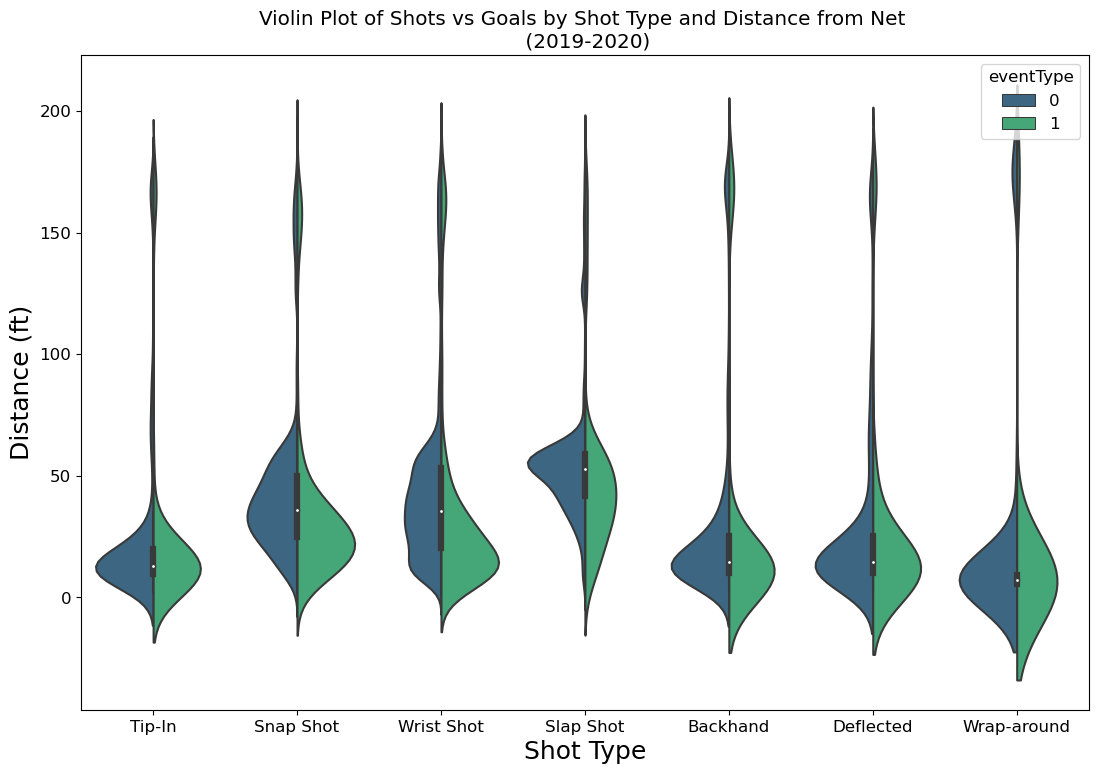

In [151]:
fig, ax = plt.subplots(figsize=(13,8.5))
plt.axis('on')
plt.rcParams.update({'font.size': 12})
plt.rcParams["axes.labelsize"] = 18
ax = sns.violinplot(x="shotType", y="distance", hue="eventType",
                data=df, palette="viridis", split=True)
plt.title('Violin Plot of Shots vs Goals by Shot Type and Distance from Net \n (2019-2020)')
plt.xlabel('Shot Type')
plt.ylabel('Distance (ft)')